# Попробовать методы регрессии на своих наборах данных. Работа будет засчитана, если коэффициент детерминации будет не меньше, чем 0.85. Чтобы достигнуть этой метрики вам понадобится:

Бетон<br>Cement (цемент) - количественный, кг на кубометр смеси.<br>
Blast Furnace Slag (шлак доменной печи) - количественный, кг на кубометр смеси.<br>
Fly Ash (зола-унос) - количественный, кг на кубометр смеси.<br>
Water (вода) - количественный, кг на кубометр смеси.<br>
Superplasticizer (суперпластификатор) - количественный, кг на кубометр смеси.<br>
Coarse Aggregate (крупный заполнитель) - количественный, кг на кубометр смеси.<br>
Fine Aggregate (мелкий заполнитель) - количественный, кг на кубометр смеси.<br>
Age (возраст) - количественный, дни (от 1 до 365).<br>Concrete compressive strength (прочность бетона на сжатие) - количественный, МПа.

# 1.Загрузить данные

In [29]:
import pandas as pd
import numpy as np
path = "C:/Users/dima/.cache/kagglehub/datasets/elikplim/concrete-compressive-strength-data-set/versions/1/concrete_data.csv"
df = pd.read_csv(path, sep=',')
df = df.dropna(how='any')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 2.Проанализировать их

In [27]:
df.describe() 

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


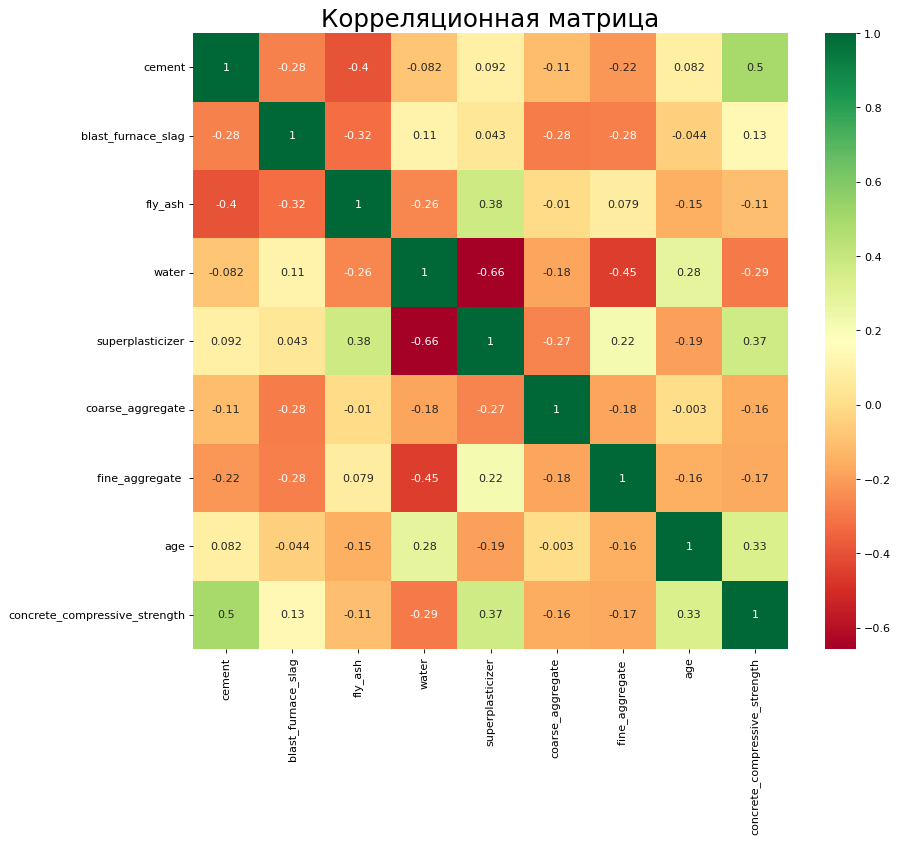

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', annot=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.show()

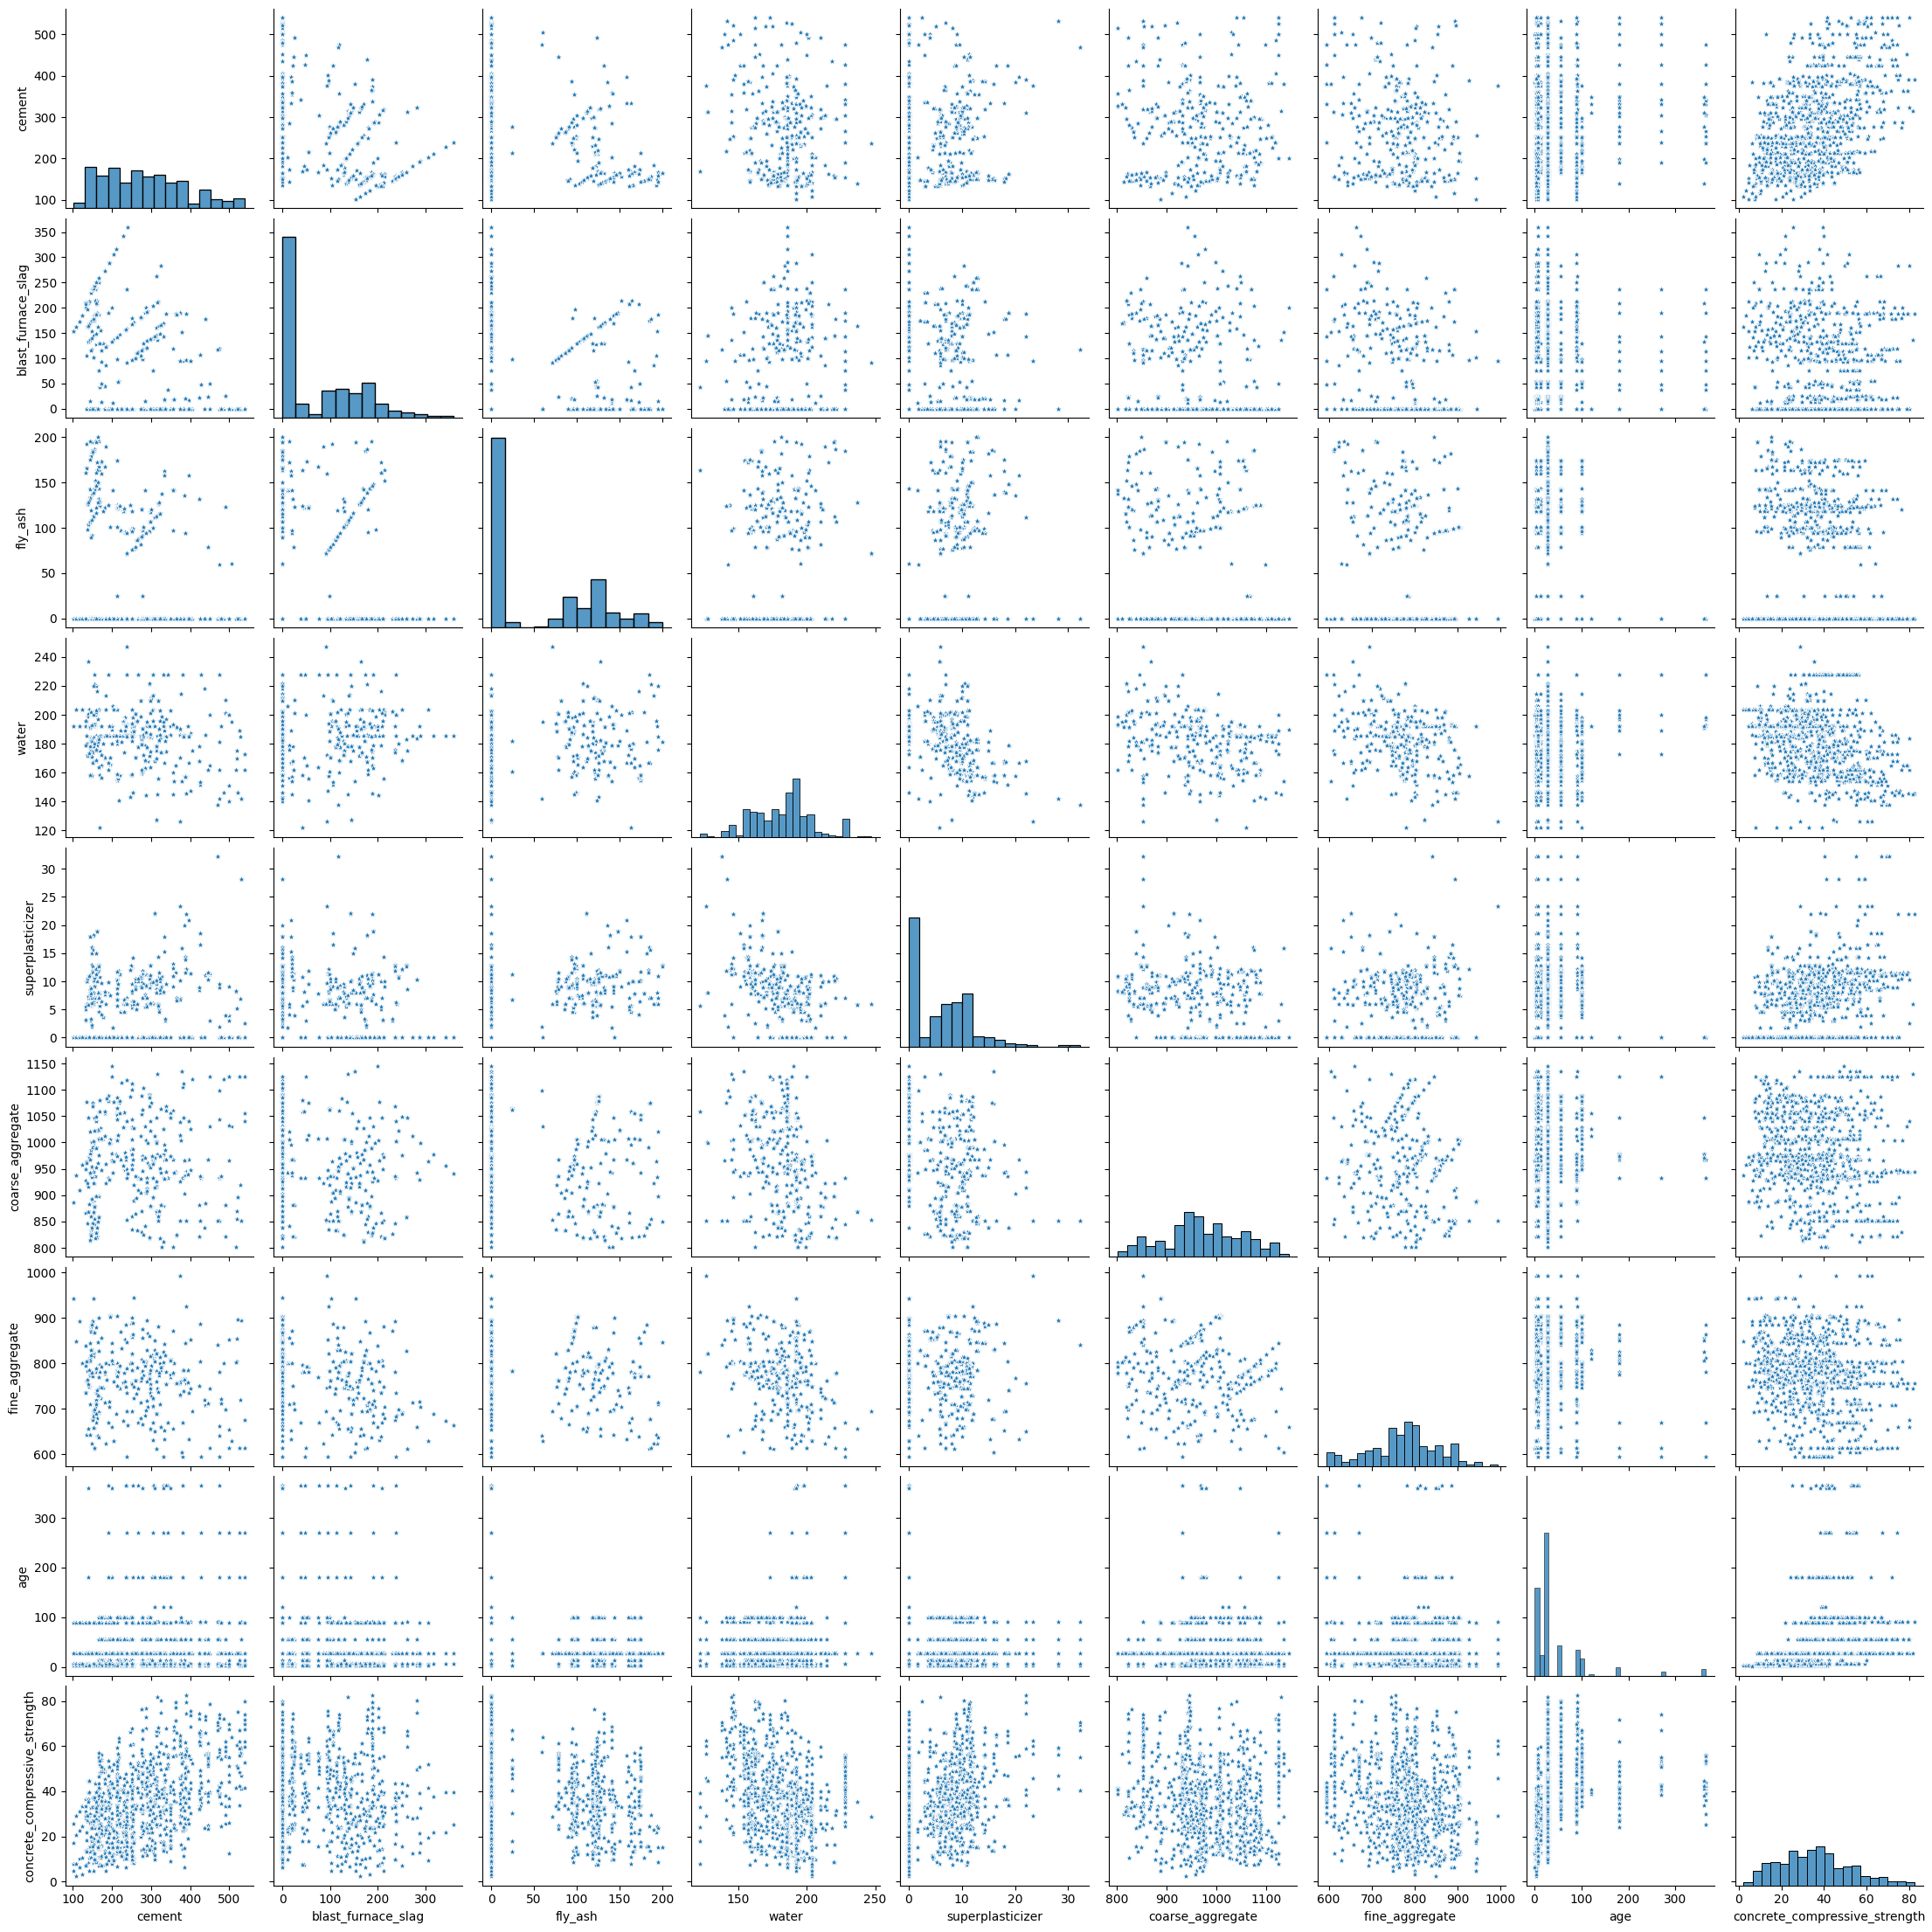

In [32]:
sns.pairplot(df, markers='*')
plt.show()

# 3.Предобработать данные

In [34]:
#Нормализация
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = df.iloc[:, :8]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

y = df.iloc[:, -1].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.Попробовать разные методы регрессии <br> 5.Получить метрики <br> 6.Визуализировать регрессию на одном из параметров

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

1) Линейная регрессия

In [36]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(model_LR, X_train, y_train, X_test, y_test, y_pred_LR)

RMSE:  9.7965
  R2: 0.6276
 Adjusted R2: 0.6124
 Cross Validated R2: 0.5894


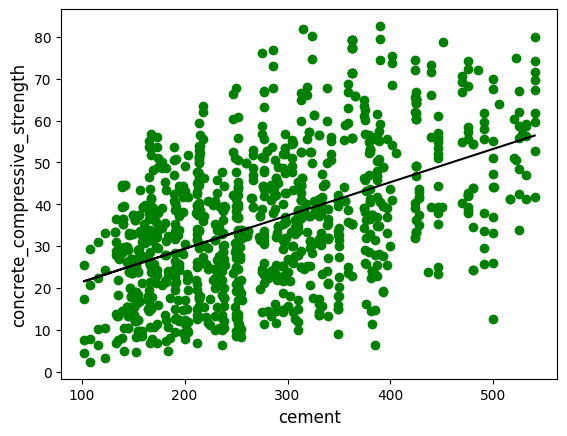

In [40]:
X2 = df['cement'].values[:,np.newaxis]
y2 = df['concrete_compressive_strength'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('concrete_compressive_strength', size=12)
plt.xlabel('cement', size=12)
plt.show()

2) Полиномиальная регрессия

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

model_PR = LinearRegression()
model_PR.fit(X_p_train, y_p_train)
y_pred_PR = model_PR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(model_PR, X_p_train, y_p_train, X_p_test, y_p_test, y_pred_PR)

RMSE:  6.0929
  R2: 0.8628
 Adjusted R2: 0.7065
 Cross Validated R2: 0.7739


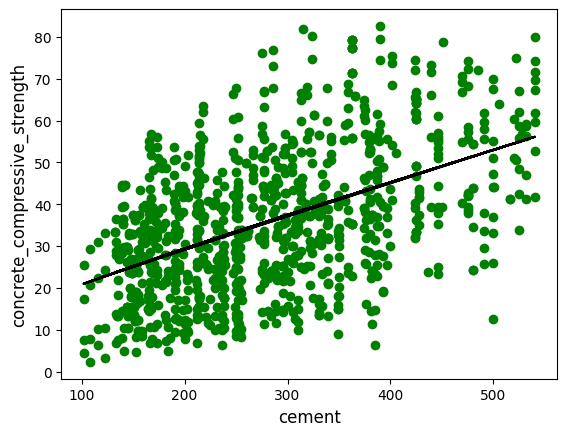

In [42]:
X2 = df['cement'].values[:,np.newaxis]
y2 = df['concrete_compressive_strength'].values

poly_features = poly.fit_transform(X2)
model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('concrete_compressive_strength', size=12)
plt.xlabel('cement', size=12)
plt.show()

3) Регрессия дерева принятия решений

In [43]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)
y_pred_dt = model_DT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(model_DT, X_train, y_train, X_test, y_test, y_pred_dt)

RMSE:  6.5588
  R2: 0.8331
 Adjusted R2: 0.8263
 Cross Validated R2: 0.8238


4) Регрессия случайного леса

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
model_RF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model_RF.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_rf = model_RF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(model_RF, X_train, y_train, X_test, y_test, y_pred_rf)

RMSE:  5.5406
  R2: 0.8809
 Adjusted R2: 0.876
 Cross Validated R2: 0.9086


5) Регрессия опорных векторов (SVR)

In [45]:
from sklearn.svm import SVR

model_SVR = SVR(C=1, epsilon=0.01,kernel='linear')

model_SVR.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_svr = model_SVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(model_SVR, X_train, y_train, X_test, y_test, y_pred_svr)

RMSE:  10.9286
  R2: 0.5365
 Adjusted R2: 0.5177
 Cross Validated R2: 0.5402


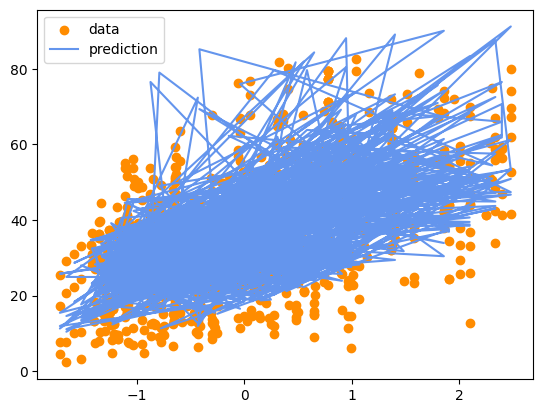

In [46]:
plt.scatter(X_train["cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["cement"], model_SVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [47]:
# Полиномиальное ядро
model_SVR2 = SVR(kernel='poly')
model_SVR2.fit(X_train, y_train)
y_pred_svr2 = model_SVR2.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(model_SVR2, X_train, y_train, X_test, y_test, y_pred_svr2)

RMSE:  11.2644
  R2: 0.5076
 Adjusted R2: 0.4876
 Cross Validated R2: 0.4782


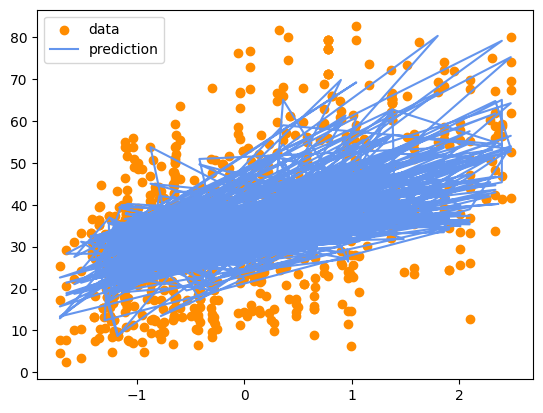

In [48]:
plt.scatter(X_train["cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["cement"], model_SVR2.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

6) Регрессия ElasticNet

In [49]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.1, l1_ratio=0.8)
model_EN.fit(X_train, y_train)

# Predict the response for a new data point
y_pred_en = model_EN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(model_EN, X_train, y_train, X_test, y_test, y_pred_en)

RMSE:  9.863
  R2: 0.6225
 Adjusted R2: 0.6071
 Cross Validated R2: 0.5881


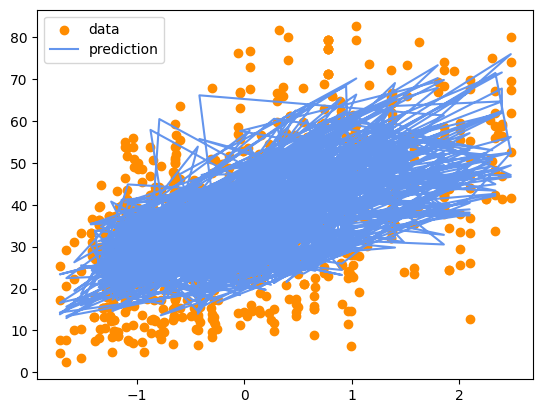

In [50]:

plt.scatter(X_train["cement"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["cement"], model_EN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Кооэф. детерминации у случайного леса > 0.85
